## Are those who observe cheating more likely to start cheating?

This project is to answer an empirical social science question: are those who observe cheating more likely to start cheating in games? The social contagion of cheating on the massive multiplayer online game PlayerUnknown's Battlegrounds (PUBG) will be studyed in this project. 


Our hypothesis is that players who observe cheating become likely to adopt cheating themselves. To test this hypothesis, I will first count how many observers of cheaters become cheaters within a certain period of time. I will call these observer–cheater motifs. I will then simulate alternative universes in which the players played the same game but happened to be killed by someone else. Finally, I will compare how the count of the observer–cheater motifs observed in the actual data compares to what I would expect in a "randomized" world.

### Data

The data were collected by Jinny Kim are attached in the repository, contains the following two files:

* `cheaters.txt` – contains cheaters who played between March 1 and March 10, 2019
    1. player account id
    * estimated date when the player started cheating
    * date when the player's account was banned due to cheating
    
* `kills.txt` – contains the killings done in 6,000 randomly selected matches played between March 1 and March 10, 2019
    1. match id 
    * account id of the killer
    * account id of the player who got killed
    * time when the attack (killing) happened

The modular function/methods are in the separate .py file [CoduModu.py](https://github.com/Chane9/Study-on-Social-Contagion-of-Cheating/blob/main/CodeModu.py). I will recall the functions/methods needed from that .py file during analysis. 

### Step 1. Observers of cheating start cheating

Cheating players can be recognized because they exhibit abnormal killing patterns. I will assume that player A realizes that cheating occurs if either:
1. cheating player B kills at least 3 other players before A gets killed in the game

or 

2. A is killed by cheating player B.

Count how many players observed at least one cheater and then started cheating within the next 5 days. I will assume here that I can only talk about a causal relationship if the two events (observing a cheater and starting to cheat) are relatively proximate in time (within 5 days of each other). In essence, I am looking for temporal motifs in which player A observes B and then A becomes cheater, but the timing between the two events should not be more than 5 days. 

#### Further assumptions Made:
1. The starting time of cheating is estimated as a date in the data, so assume that a day starts at 00:00.
2. If a game happens across the 00:00, and one player is marked as a cheater for the second day, I assumed that player is not a cheater for this game.
3. As the cheating date data always start at 00:00, thus I assume that if observation time and start cheating time are on the same day: I do not regard that player as observer-cheater motif.

In [17]:
# Import modules to estimate and show results
import CodeModu

# Read cheaters in as dictionary
cheaters = dict()
with open('../assignment-final-data/cheaters.txt') as cheaterlst:
    for line in cheaterlst:
        linestr = line.strip().split('\t')
        cheaters[linestr[0]] = [linestr[1], linestr[2]]
        
# read kill records in as dictionary
games = dict()
with open('../assignment-final-data/kills.txt') as kills:
    for line in kills:
        linestr = line.strip().split('\t')
        if linestr[0] not in games.keys():
            games[linestr[0]]=([[linestr[1], linestr[2],  linestr[3]]])
        else:
            games[linestr[0]].append([linestr[1], linestr[2], linestr[3]])
Games = games

In [18]:
Motif = CodeModu.Motif_judgement(games, cheaters)
Motif.observer_judgement()
initialcount = Motif.motif_judgement()
print('The number of observer-cheater motif is:', initialcount)

The number of observer-cheater motif is: 185


 ### Step 2. Simulating an alternative universe

Of course, proximal in time does not necessarily mean causal. 

To establish causality, I will simulate an alternative world in which everything is the same but the events took somewhat different sequence. If observing cheating causes cheating, in the randomized world we will observe fewer observer–cheater motifs than in reality. To simulate an alternative universe, I will keep the timing and structure of interactions but randomly assign the identities of players. There are certain restrictions we need to observe, however: 

* Randomize is within a game, not between games. 
* Since cheaters may tend to kill more or kill at a specific period in the game, we will preserve their position in the killing network. That is, only non-cheaters should be randomly reassigned. 

The figure below illustrates how shuffling should be completed:

![Match randomization](match_randomization_diagram.png)



### Step 3. Evaluating reality against alternative universes 

10 randomizations have been conducted for the data. Then plot the number of observer–cheater motifs observed in the actual data compared to the distribution get in the randomized data.  

In [19]:
record = list()
for i in range(10):
    games = Games
    games = CodeModu.random_noncheaters(games, cheaters)
    Motif = CodeModu.Motif_judgement(games, cheaters)
    observer = Motif.observer_judgement()
    record.append(Motif.motif_judgement())

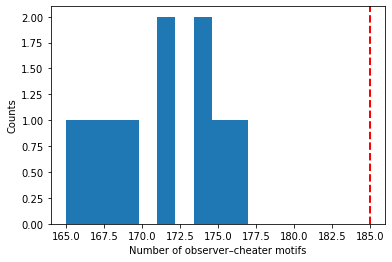

In [20]:
import matplotlib.pyplot as plt
plt.hist(record)
plt.xlabel('Number of observer–cheater motifs')
plt.ylabel('Counts')
plt.axvline(x = initialcount, color='r', linestyle='dashed', linewidth=2)

The hypothesis is that players who observe cheating become more likely to adopt cheating themselves. According to our ouput:
342598 player and (2295-170) spontaneous cheaters: The proportion of the transfer is 0.62%.
Around 67501 observers and around 170 observser-cheater: The proportion of the transfer is 0.25%.
The histogram now shows a normal distribution, thus we could do t-test on it. While, under my assumption, no evdience shows that the players who observe cheating become more likely to adopt cheating themselves. Thus we cannot accept our null hypothesis. To note, under different assumptions, different results may be achieved. 

In [21]:
# calculation for conclusion
print("Number of Observer-cheater motif:", sum(record)/len(record))
playerlst = []
for game_id in games.keys():
    for i in range(len(games[game_id])):
        playerlst.append(games[game_id][i][0])
        playerlst.append(games[game_id][i][1])
print('Number of players:', len(set(playerlst)))
print('Number of cheaters:', len(cheaters))

Number of Observer-cheater motif: 171.3
Number of players: 342598
Number of cheaters: 2295
